In [116]:
import time
from datetime import datetime
import vectorbt as vbt

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

import matplotlib.pyplot as plt

In [117]:
data = pd.read_csv('GBPUSD_1h.csv')
data.tail()

,timestamp,open,high,low,close,adj close,volumn
5011,2022-08-30 13:00:00+01:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 14:00:00+01:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 15:00:00+01:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 16:00:00+01:00,1.163399,1.167174,1.163399,1.165189,1.165189,0
5015,2022-08-30 17:00:00+01:00,1.165365,1.166521,1.164985,1.165189,1.165189,0


In [118]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df

,timestamp,open,high,low,close,adj close,volumn
0,2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0
1,2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0
2,2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0
3,2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0
4,2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0
...,...,...,...,...,...,...,...
5011,2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0
5012,2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0
5013,2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0
5014,2022-08-30 15:00:00,1.163399,1.167174,1.163399,1.165189,1.165189,0


In [45]:
stoch_ema = ta.Strategy(
    name = 'Stochastic and EMA',
    description = 'Stochastic and EMA',
    ta = [
        {'kind': 'stoch', 'k': 14},
        {'kind': 'ema', 'length': 200},
        {'kind': 'atr', 'length': 14}
    ]
)
df.ta.strategy(stoch_ema)
df

,timestamp,open,high,low,close,adj close,volumn,STOCHk_14_3_3,STOCHd_14_3_3,EMA_200,ATRr_14,STOCHk_4_3_3,STOCHd_4_3_3
0,2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0,35.351567,50.205728,1.182105,0.002143,17.185229,33.651069
5012,2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0,26.387288,37.763129,1.181984,0.002186,17.655791,22.632116
5013,2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0,13.760494,25.166450,1.181794,0.002568,12.347485,15.729502
5014,2022-08-30 15:00:00,1.163399,1.167174,1.163399,1.165189,1.165189,0,14.329203,18.158995,1.181629,0.002688,17.356077,15.786451


In [127]:
class Stoch_and_EMA:
    def __init__(self, params):
        
        self.current_action = 'close'
        self.atr = params['atr']
        self.stoch = params['stoch']
        
        self.ema = params['ema']
        self.rr = params['rr']
        self.overbought = params['overbought']
        self.oversold = params['oversold']
        
        self.df = params['df']
        self.pip = params['pip']
        self.pip_value = params['pip_value']
        self.target_tp = params['target_tp']
        
        self.latest_sl = 0
        self.latest_tp = 0
        self.latest_entry = 0
        self.status = 'idle' # idle, overbought, oversold
        
    def get_df(self):
        return self.df
    
    def calLotSize(self, entry, exit):
        return abs(round(self.target_tp / (entry - exit)  , 2))
#         return abs(round(self.target_tp / (((entry - exit) / self.pip ) * self.pip_value ) , 2))

    def longCondition(self, row):
        if row['STOCHk_'+str(self.stoch)+'_3_3'] < self.oversold and self.status == 'idle':
            self.status = 'oversold'

        if self.status == 'oversold' and row['STOCHk_'+str(self.stoch)+'_3_3'] > self.oversold:
            self.status = 'idle'

        if  row['EMA_'+str(self.ema)] < row['low'] and self.status == 'oversold' and \
                row['prev_d'] < row['prev_k'] and row['STOCHd_'+str(self.stoch)+'_3_3'] > row['STOCHk_'+str(self.stoch)+'_3_3']:
                # row['prev_d'] < row['prev_k'] and 
                
            row['entries'] = True
            self.status = 'idle'
            self.current_action = 'long'
                
            self.latest_sl = row['low'] - row['ATRr_'+str(self.atr)]
            self.latest_tp = row['open'] + (self.rr * abs(row['open'] - self.latest_sl))
            row['lot_size'] = self.calLotSize(row['open'], self.latest_tp)
            self.latest_entry = row['open']
                
    def longResult(self, row):
        atr_price = self.latest_entry + abs(self.latest_entry - self.latest_sl)
        if row['low'] <= self.latest_sl:
            self.current_action = 'close'
            row['exits'] = True
            row['price_action'] = self.latest_sl
            row['lot_size'] = 0
                    
        elif row['high'] >= self.latest_tp:
            self.current_action = 'close'
            row['exits'] = True
            row['price_action'] = self.latest_tp
            row['lot_size'] = 0
                    
    def shortCondition(self, row):
        if row['STOCHk_'+str(self.stoch)+'_3_3'] > self.overbought and self.status == 'idle':
            self.status = 'overbought'

        if self.status == 'overbought' and row['STOCHk_'+str(self.stoch)+'_3_3'] < self.overbought:
            self.status = 'idle'

        if  row['EMA_'+str(self.ema)] > row['high'] and self.status == 'overbought' and \
                row['prev_d'] > row['prev_k'] and row['STOCHd_'+str(self.stoch)+'_3_3'] < row['STOCHk_'+str(self.stoch)+'_3_3']:
                # row['prev_d'] > row['prev_k'] and 
                    
            row['short_entries'] = True
            self.current_action = 'short'
            self.status = 'idle'
                
            self.latest_sl = row['high'] + row['ATRr_'+str(self.atr)]
            self.latest_tp = row['open'] - (self.rr * abs(row['open'] - self.latest_sl))
            row['lot_size'] = self.calLotSize(row['open'], self.latest_tp)
            self.latest_entry = row['open']
                
    def shortResult(self, row):
        atr_price = self.latest_entry - abs(self.latest_entry - self.latest_sl)
        if row['high'] >= self.latest_sl:
            self.current_action = 'close'
            row['short_exits'] = True
            row['price_action'] = self.latest_sl
            row['lot_size'] = 0
                    
        elif row['low'] <= self.latest_tp:
            self.current_action = 'close'
            row['short_exits'] = True
            row['price_action'] = self.latest_tp
            row['lot_size'] = 0
                                
    def createLongOrders(self, row):
        if self.current_action == 'close':
            self.longCondition(row)
            self.longResult(row)
        else:
            self.longResult(row)
        
        return row
    
    def createShortOrders(self, row):
        if self.current_action == 'close':
            self.shortCondition(row)
            self.shortResult(row)
        else:
            self.shortResult(row)
                    
        return row
    
    def createBothOrders(self, row):
        if self.current_action == 'close':
            self.longCondition(row)
            self.shortCondition(row)
            
        if self.current_action == 'long':
            self.longResult(row)
                    
        if self.current_action == 'short':
            self.shortResult(row)
                    
        return row
                    
    def createStrategy(self):
        stoch_ema = ta.Strategy(
            name = 'Stochastic and EMA',
            description = 'Stochastic and EMA',
            ta = [
                {'kind': 'stoch', 'k': self.stoch},
                {'kind': 'ema', 'length': self.ema},
                {'kind': 'atr', 'length': self.atr}
            ]
        )
        self.df.ta.strategy(stoch_ema)
        
        self.df['timestamp'] = pd.to_datetime(self.df['timestamp'])
        self.df['entries'] = False
        self.df['exits'] = False
        
        self.df['short_entries'] = False
        self.df['short_exits'] = False
        self.df['price_action'] = self.df['open']
        
        self.df['prev_d'] = self.df['STOCHd_'+str(self.stoch)+'_3_3'].shift(1)
        self.df['prev_k'] = self.df['STOCHk_'+str(self.stoch)+'_3_3'].shift(1)
        self.df['lot_size'] = np.nan
        
    def getBothOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createBothOrders(row), axis=1)
                                                                
        return self.df
        
    def getLongOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createLongOrders(row), axis=1)
                                                                
        return self.df
    
    def getShortOrders(self):
        self.createStrategy()
        self.df = self.df.apply(lambda row : self.createShortOrders(row), axis=1)
                                                                
        return self.df
        

In [138]:
pair_test = Stoch_and_EMA({
    'atr': 14,
    'ema': 200,
    'stoch': 14,
    'overbought': 80,
    'oversold': 20,
    'pip': 0.0001,
    'pip_value': 10,
    'rr': 1.5,
    'target_tp': 10,
    'df': df.copy()
})

result_both = pair_test.getBothOrders().set_index('timestamp')
# result_both = pair_test.getShortOrders().set_index('timestamp')
result_both

,open,high,low,close,adj close,volumn,STOCHk_14_3_3,STOCHd_14_3_3,EMA_200,ATRr_14,entries,exits,short_entries,short_exits,price_action,prev_d,prev_k,lot_size
timestamp,,,,,,,,,,,,,,,,,,
2021-11-04 17:00:00,1.349364,1.349437,1.348418,1.349273,1.349273,0,NaN,NaN,NaN,NaN,False,False,False,False,1.349364,NaN,NaN,NaN
2021-11-04 18:00:00,1.349382,1.350366,1.349091,1.349655,1.349655,0,NaN,NaN,NaN,NaN,False,False,False,False,1.349382,NaN,NaN,NaN
2021-11-04 19:00:00,1.349509,1.350475,1.349509,1.350238,1.350238,0,NaN,NaN,NaN,NaN,False,False,False,False,1.349509,NaN,NaN,NaN
2021-11-04 20:00:00,1.350311,1.350457,1.349509,1.350020,1.350020,0,NaN,NaN,NaN,NaN,False,False,False,False,1.350311,NaN,NaN,NaN
2021-11-04 21:00:00,1.349692,1.350202,1.348745,1.350074,1.350074,0,NaN,NaN,NaN,NaN,False,False,False,False,1.349692,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-30 12:00:00,1.171921,1.172044,1.169098,1.170029,1.170029,0,35.351567,50.205728,1.182105,0.002143,False,False,False,False,1.171921,65.440658,51.550532,NaN
2022-08-30 13:00:00,1.169892,1.171921,1.169180,1.169905,1.169905,0,26.387288,37.763129,1.181984,0.002186,False,False,False,False,1.169892,50.205728,35.351567,NaN
2022-08-30 14:00:00,1.168484,1.168484,1.162372,1.162926,1.162926,0,13.760494,25.166450,1.181794,0.002568,False,False,False,False,1.168484,37.763129,26.387288,NaN


In [139]:
port = vbt.Portfolio.from_signals(result_both.price_action,
                                  entries=result_both.entries.astype('bool'),
                                  exits=result_both.exits.astype('bool'),
                                  short_entries=result_both.short_entries.astype('bool'),
                                  short_exits=result_both.short_exits.astype('bool'),
                                  size=result_both.lot_size, 
                                  freq="1h",
                                  init_cash=1000,
                                  fees=0.0002, 
                                  slippage=0.0002
                                 )

In [140]:
port.plot().show()

In [141]:
port.stats()

Start                         2021-11-04 17:00:00
End                           2022-08-30 16:00:00
Period                          209 days 00:00:00
Start Value                                1000.0
End Value                              957.794221
Total Return [%]                        -4.220578
Benchmark Return [%]                   -13.635942
Max Gross Exposure [%]                 149.641466
Total Fees Paid                         21.337068
Max Drawdown [%]                         5.749481
Max Drawdown Duration           115 days 17:00:00
Total Trades                                   23
Total Closed Trades                            23
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            34.782609
Best Trade [%]                           0.523832
Worst Trade [%]                         -1.000553
Avg Winning Trade [%]                    0.305226
Avg Losing Trade [%]                    -0.392363


In [88]:
def stoch_plot(df_plot, record, params):

    stoch_k = df_plot['STOCHk_'+str(params['stoch'])+'_3_3']
    stoch_d = df_plot['STOCHd_'+str(params['stoch'])+'_3_3']
    ema = df_plot['EMA_'+str(params['ema'])]

    overbought = np.empty(df_plot.shape[0])
    overbought.fill(80)
    oversold = np.empty(df_plot.shape[0])
    oversold.fill(20)

    entry_level = np.empty(df_plot.shape[0])
    entry_level.fill(record['Avg Entry Price'])
    exit_level = np.empty(df_plot.shape[0])
    exit_level.fill(record['Avg Exit Price'])

    entry_markers = []
    exit_marker = []

    for index, row in df_plot.iterrows():

        if index == record['Entry Timestamp'] and index == record['Exit Timestamp']:
            entry_markers.append(record['Avg Entry Price'] * 0.998 )
            exit_marker.append(record['Avg Exit Price'] * 0.998 )

        elif index == record['Entry Timestamp']:
            entry_markers.append(record['Avg Entry Price'] * 0.998 )
            exit_marker.append(np.nan)

        elif index == record['Exit Timestamp']:
            exit_marker.append(record['Avg Exit Price'] * 0.998  )
            entry_markers.append(np.nan)

        else:
            exit_marker.append(np.nan)
            entry_markers.append(np.nan)

    entry_plot = mpf.make_addplot(entry_markers, type='scatter', marker='^', markersize=20, panel=0, color='green')
    exit_plot = mpf.make_addplot(exit_marker, type='scatter', marker='^', markersize=20, panel=0, color='red')
    ema_plot = mpf.make_addplot(ema, panel=0, color='gray', width=0.8)

    k_plot = mpf.make_addplot(stoch_k, panel=1, color='blue', width=0.8, ylabel='%K')
    d_plot = mpf.make_addplot(stoch_d, panel=1, color='hotpink', width=1, ylabel='%D')
    overbought_plot = mpf.make_addplot(overbought, panel=1, color='orange', width=0.8)
    oversold_plot = mpf.make_addplot(oversold, panel=1, color='orange', width=0.8)
    trade_result = 'TP' if record['Return'] > 0 else 'SL' 

    return [entry_plot, exit_plot, k_plot, d_plot, overbought_plot, oversold_plot, ema_plot], \
        trade_result, record['Direction']

Long SL


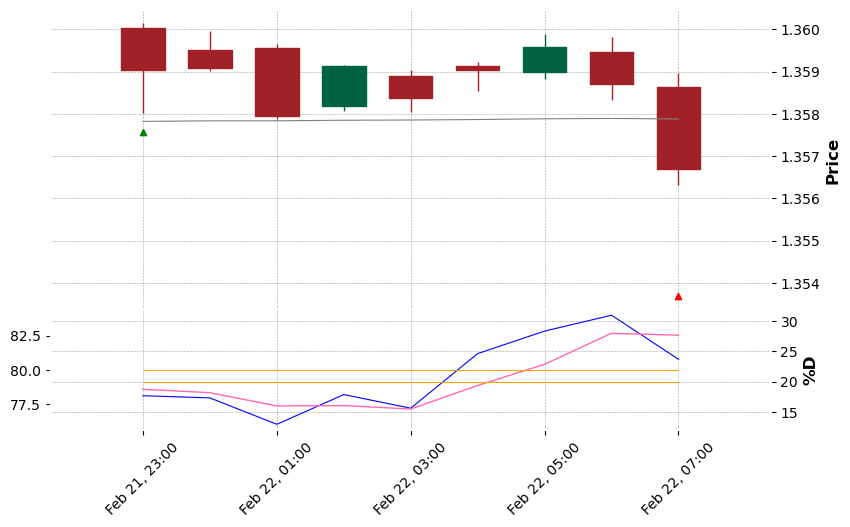

Short SL


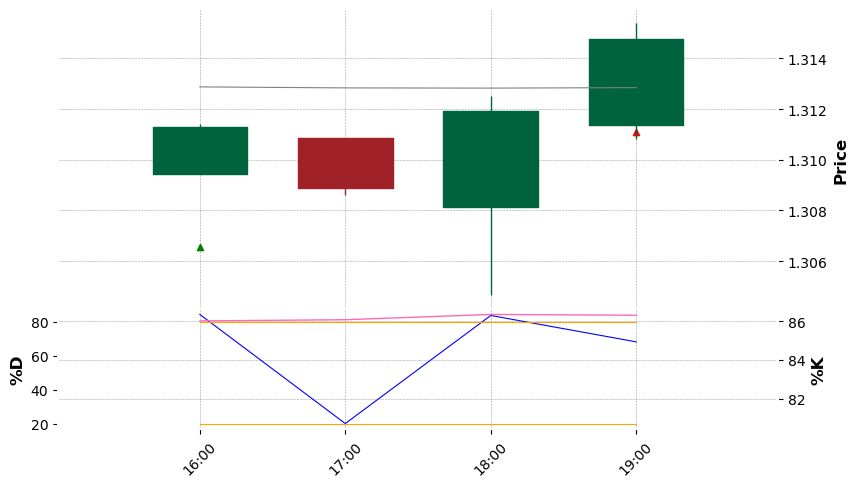

Long SL


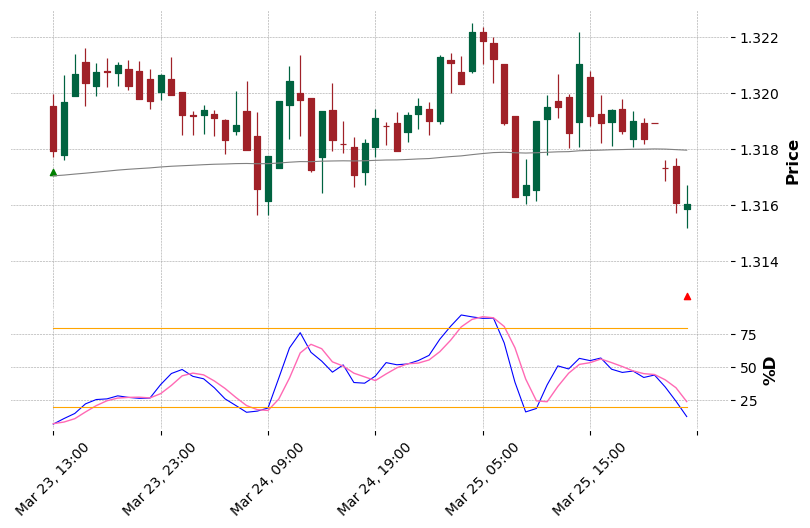

Short SL


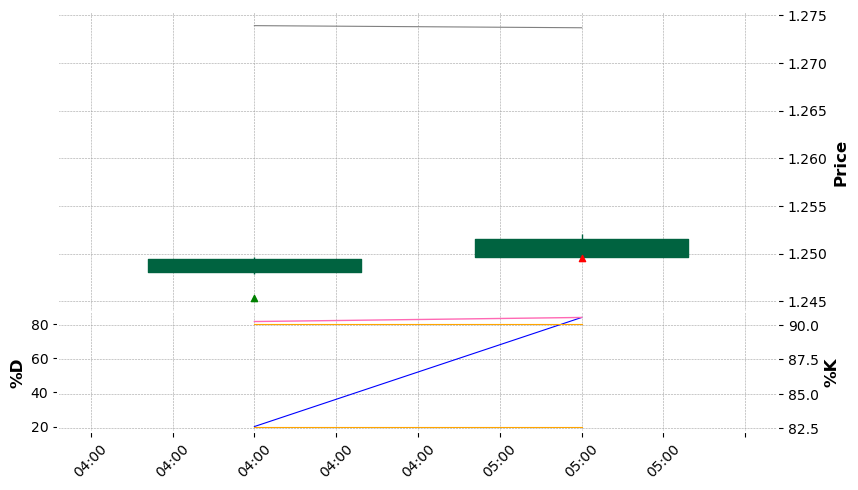

Short SL


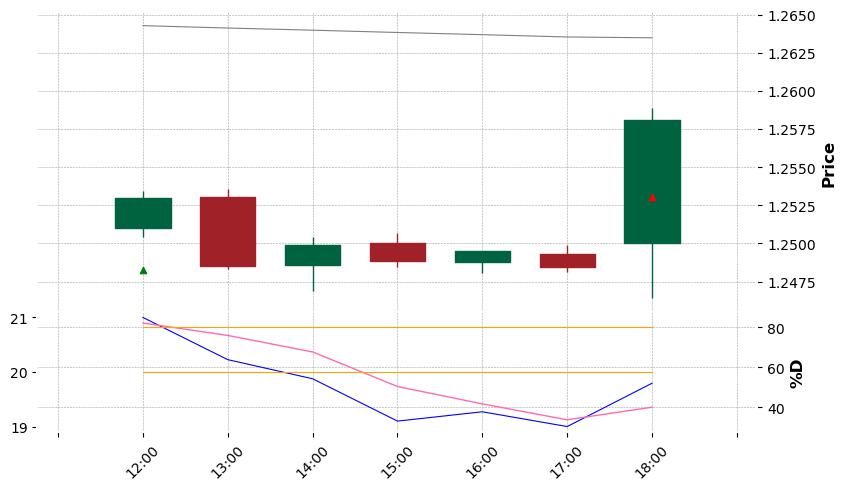

Short SL


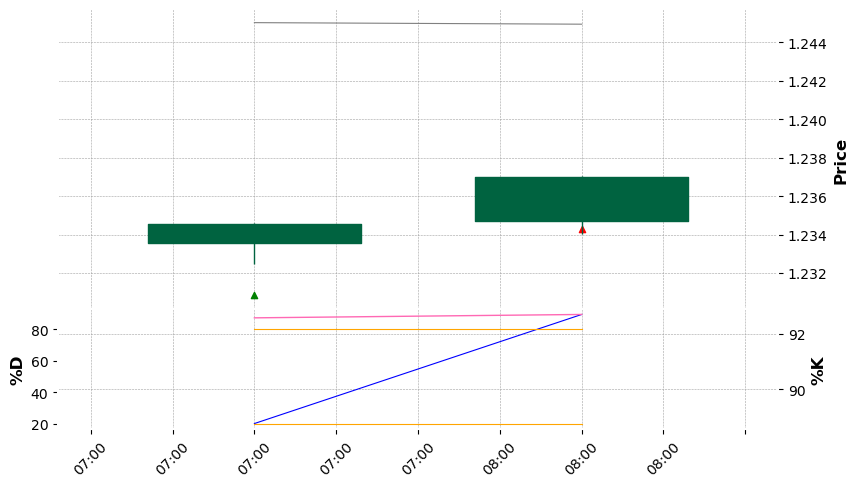

Short SL


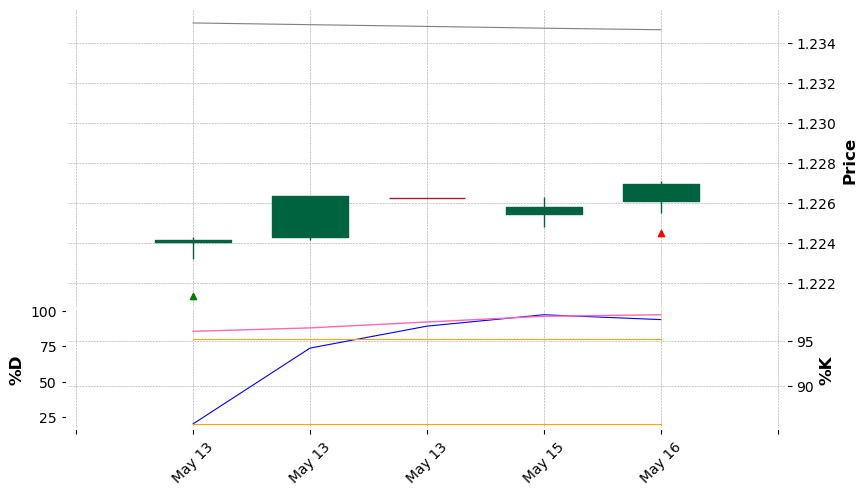

Short SL


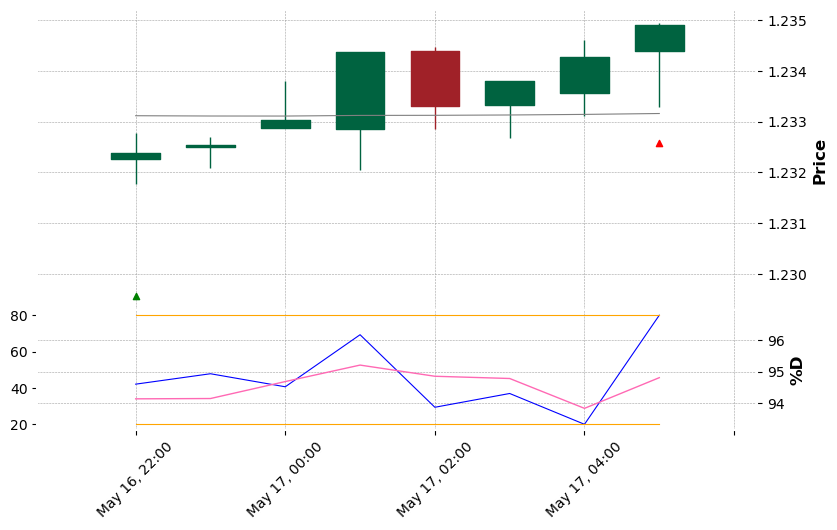

Long SL


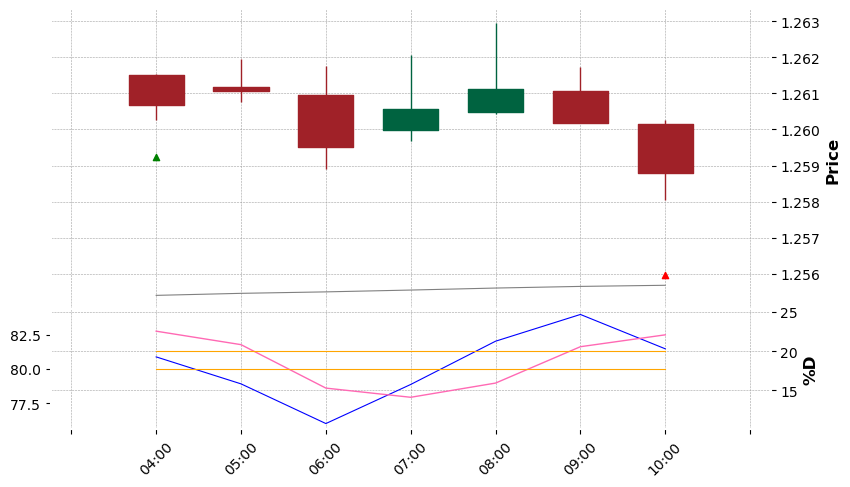

Short SL


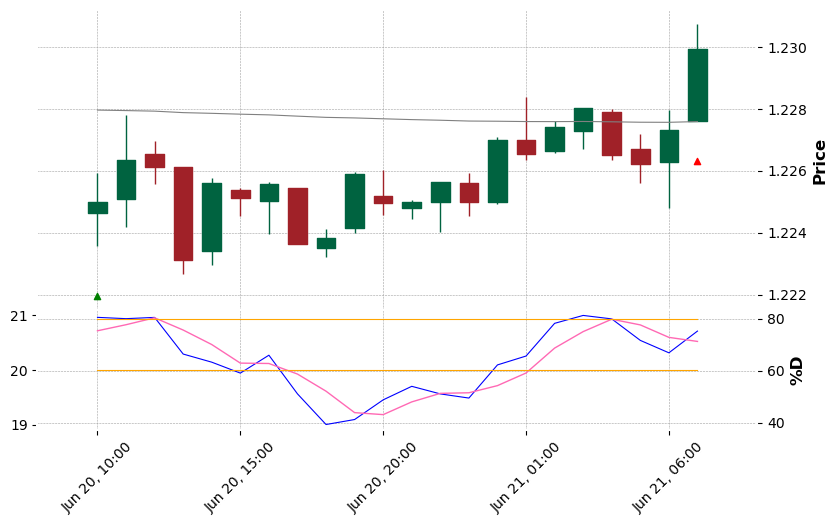

Short SL


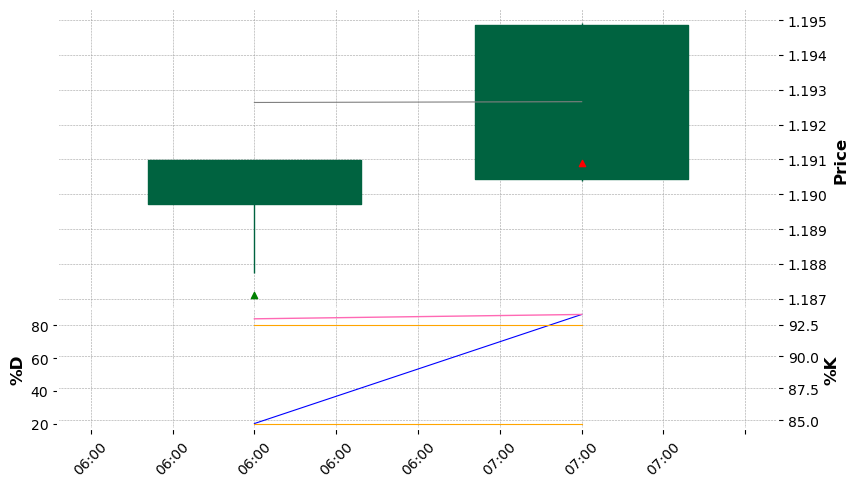

Long SL


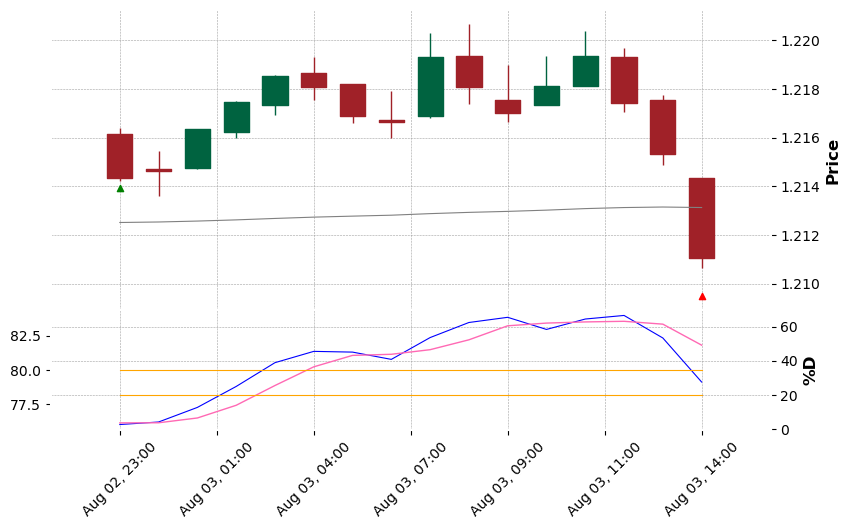

Long SL


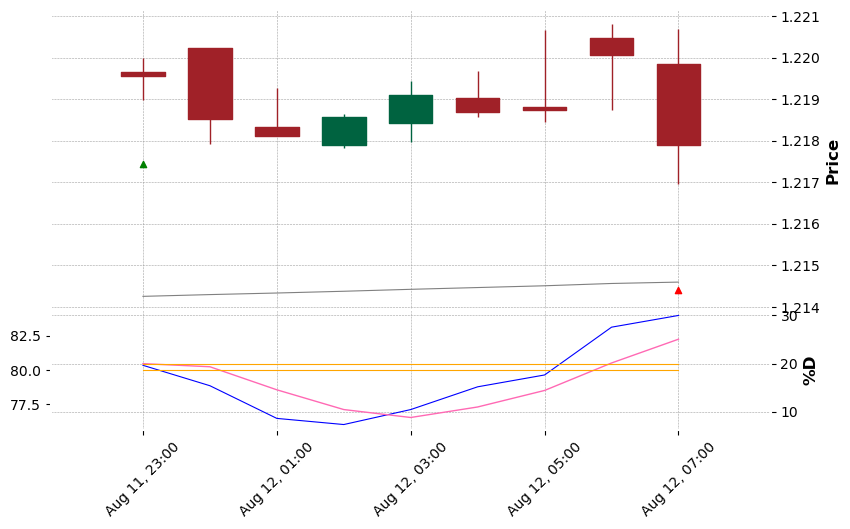

Short SL


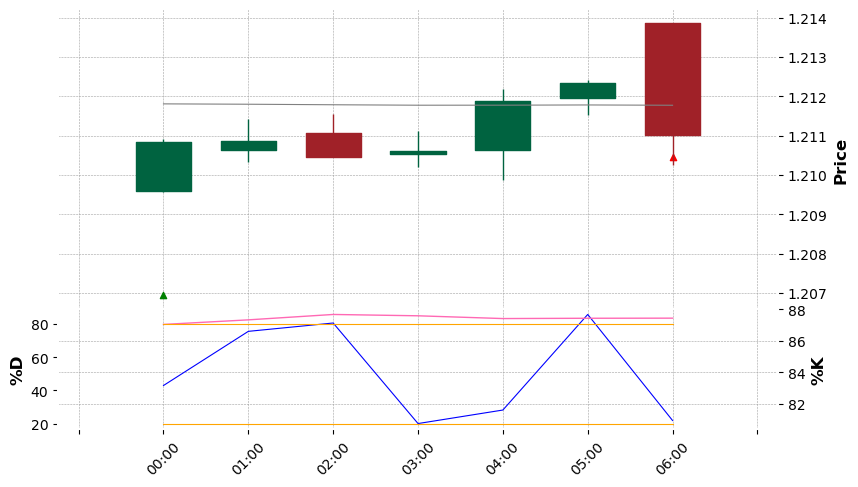

Short SL


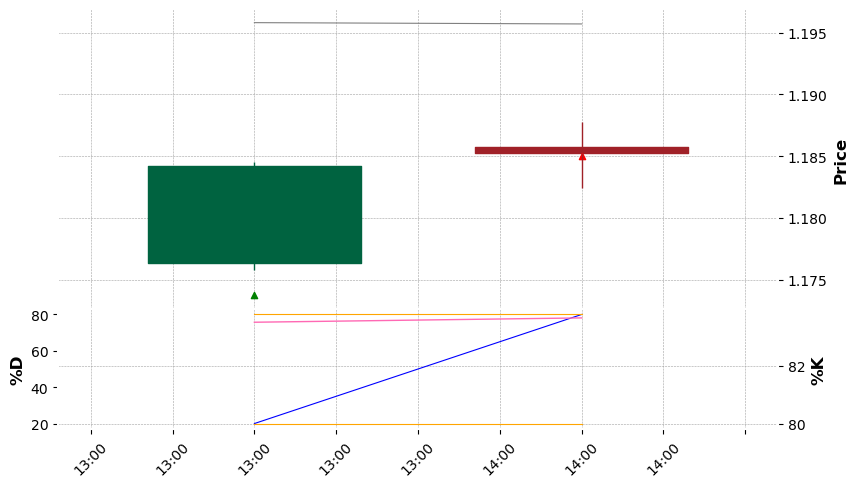

In [89]:
visualize_df = pair_test.get_df().copy()
visualize_df.set_index('timestamp', inplace = True)
trade_records = port.trades.records_readable
indicator_params = {'stoch': pair_test.stoch, 'atr': pair_test.atr, 'ema': pair_test.ema}

for index, row in trade_records.iterrows():
    start, end = row['Entry Timestamp'], row['Exit Timestamp']
    plot_df = visualize_df.loc[start:end]
    adx_info_plots, plot_result, diraction = stoch_plot(plot_df, row, indicator_params)

    if plot_result == 'SL':
        print(diraction, plot_result)
        mpf.plot(plot_df, type='candle', style='charles',
            addplot=adx_info_plots,
            figsize=(10, 6))
# trade_records